# Skewness Cut

Higher skewness resulting in more step-like functions. Possible cut here?

In [1]:
import os
os.chdir('../scripts')
from analysis_tools_cython import *

In [2]:
data = pd.read_csv('../candidates/candidates-full.csv')
data = data[data.asym_score > 1.02]
#data = data[data['class'] == 'red']

In [4]:
test = data[(data.skewness < 8) & (data['skewness_err'] <= 0.5 * data['skewness'])]
len(test)

295

Text(0, 0.5, 'skewness')

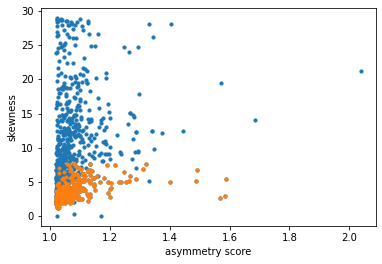

In [18]:
plt.scatter(data.asym_score,data.skewness,s=10)
plt.scatter(test.asym_score,test.skewness,s=10)
plt.xlabel('asymmetry score')
plt.ylabel('skewness')

Text(0, 0.5, 'snr')

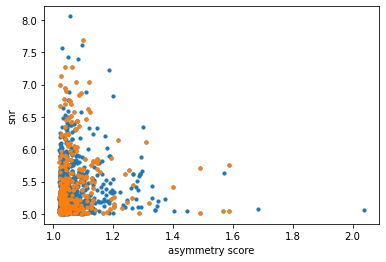

In [17]:
plt.scatter(data.asym_score,abs(data.snr),s=10)
plt.scatter(test.asym_score,abs(test.snr),s=10)
plt.xlabel('asymmetry score')
plt.ylabel('snr')

Text(0, 0.5, 'duration')

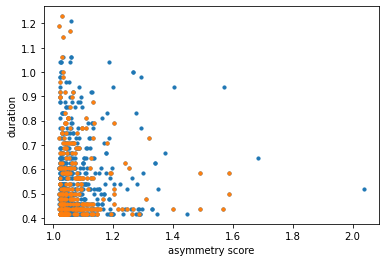

In [16]:
plt.scatter(data.asym_score,data.duration,s=10)
plt.scatter(test.asym_score,test.duration,s=10)
plt.xlabel('asymmetry score')
plt.ylabel('duration')

In [69]:
bad = data[(data.skewness > 8) & (data['skewness_err'] >= 0.5 * data['skewness'])]

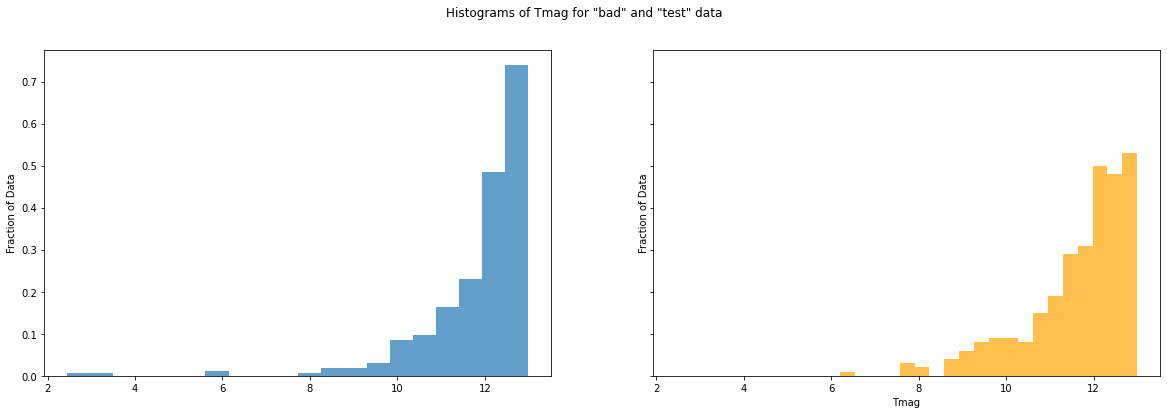

In [84]:
fig, axes = plt.subplots(1,2, figsize=(20, 6), sharex=True,sharey=True)

# Assuming 'bad.Tmag' and 'test.Tmag' are your data
axes[0].hist(bad.Tmag, bins=20, density=True, zorder=3, alpha=0.7)
axes[1].hist(test.Tmag, bins=20, density=True, zorder=1, color='orange', alpha=0.7)

# Add labels and title for each subplot
axes[0].set_ylabel('Fraction of Data')
axes[1].set_ylabel('Fraction of Data')
axes[1].set_xlabel('Tmag')

# You can add a title for the entire figure if needed
plt.suptitle('Histograms of Tmag for "bad" and "test" data')

plt.show()

Ones that are over skewness criteria seem to be mainly around fainter stars. Makes sense as they are noisier.

---

## HR Diagram

In [28]:
tic = pd.read_csv('../tic_catalog.txt',sep='\t')
tic['bp-rp'] = tic['gaiabp'] - tic['gaiarp']
tic['M'] = tic['GAIAmag'] - (5 * (np.log10(tic['d'])) ) + 5
test['bp-rp'] = test['gaiabp'] - test['gaiarp']
test['M'] = test['GAIAmag'] - (5 * (np.log10(test['d'])) ) + 5

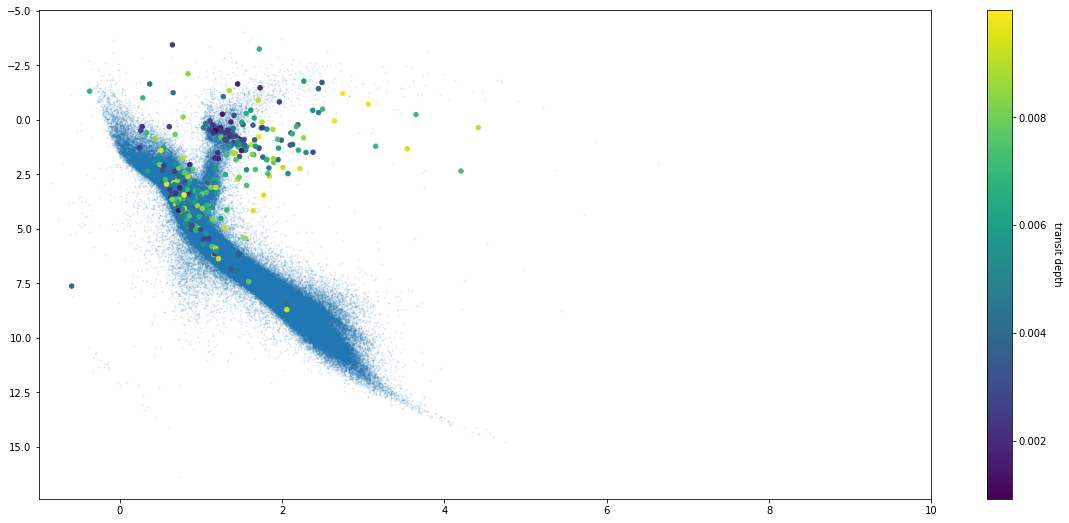

In [36]:
plt.figure(figsize=(20,9))
plt.scatter(tic[tic.d < 200]['bp-rp'],tic[tic.d < 200].M,s=1,alpha=0.1)
scatter = plt.scatter(test['bp-rp'], test['M'], s=20,c=(test.abs_depth))
plt.gca().invert_yaxis()
plt.xlim([-1,10])
cbar = plt.colorbar(scatter)
cbar.set_label('transit depth', rotation=270, labelpad=15)
plt.show()

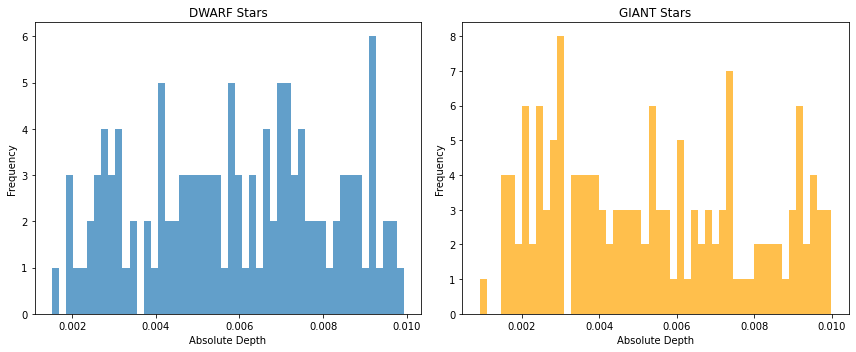

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram for DWARF in the first subplot
axes[0].hist(test[test.lumclass == 'DWARF'].abs_depth, bins=50, alpha=0.7)
axes[0].set_title('DWARF Stars')
axes[0].set_xlabel('Absolute Depth')
axes[0].set_ylabel('Frequency')

# Plot the histogram for GIANT in the second subplot
axes[1].hist(test[test.lumclass == 'GIANT'].abs_depth, bins=50, color='orange', alpha=0.7)
axes[1].set_title('GIANT Stars')
axes[1].set_xlabel('Absolute Depth')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

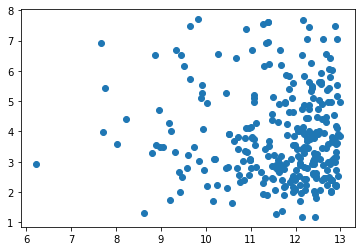

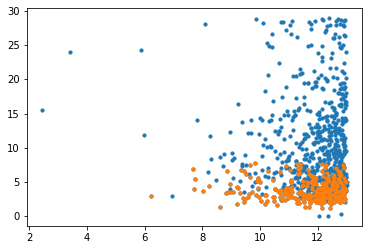

In [49]:
plt.scatter(data.Tmag, data.skewness,s=10)
plt.scatter(test.Tmag,test.skewness,s=10)